<a href="https://colab.research.google.com/github/piziomo/Machine-Learning/blob/main/Deep%20Learning%20Intro/Deep%20learning%20Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week 01: Introduction to Deep Learning

**Welcome** to the Generative AI labs 😊

The aim of these sessions is to give you a hands-down exposure to the technical part of Generative AI. We do *not* assume any prior technical and/or machine or deep learning experience. We hope that the practicals will give you an opportunity to get an idea of how the Generative AI works and experiment with it yourself. Have fun!

If you have any questions or concerns about the labs then feel free to drop an email or Teams message to us!


### Goals for this week

Weeks 1 and 2 are designed to equip the students with the basic understanding of the ideas underlying deep learning. This will help to develop a better understanding of *Generative AI*.


By the end of the lesson, you should:
- be able to differentiate between a single-layer perceptron and multi-layer perceptron and betwee a shallow and deep neural network;
- be able to build and evaluate a single-layer perceptron and a multi-layer perceptron (by following the code!);
- be aware of the fundamental deep learning terminology;


At the end of the lab we will have a *bonus* activity. We will implement a very simple "Deep Dream" technique based on our multi-layer perceptron model that we will build today.






### Machine Learning and Deep Learning

Deep learning (DL) is a subfield of machine learning (ML), which is a subfield of artificial intelligence (AI).

In this module we will not be be focusing on all three, however it is good to know the difference, so that you use the terminology correctly.

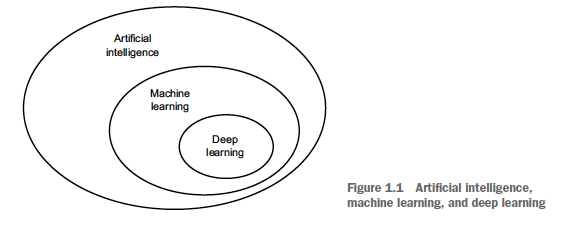

(Source: Chollet 2021, p.2)

**Machine learning**, contrary to the so-called Symbolic AI (based on if-else (rules-based) statements), is a trained system. It learns from many examples to find statistical patterns that then are used to complete the task.

**Deep learning** is a subfield of machine learning, which is based on the layers of representations of data.
- **Neural Networks** are models based on those layered representations.

Where does **generative AI** sit within the field of AI? Gozalo-Brizuela et al. (2023, p.1) defines Generative AI as that which "can generate novel content". However, be careful in positioning Generative AI as a subfield of deep learning because, as Foster (2023, p.4, p.20) notes, generative modelling as such is "a branch of machine learning that involves training a model to produce new data that is similar to a given dataset." Given this, deep learning did play a role in advance generative modelling as majority of them "have a deep neural network at their core".

### What is a neural network?

The most basic artificial neural network (ANN) is composed of two parts: an input (layer) and an output layer. It can be called a **percpetron** (or a single-layer perceptron). If there is at least one hidden layer (a layer between an input layer and an output layer) then it can be called a **multi-layer perceptron** (MLP). An MLP is shown in an image below.

Another common way to talk about ANNs is by referring to their "depth". A **deep neural network** (aka "deep" learning) has multiple hidden layers. A **shallow neural network** is usually described as a network with one hidden layer.

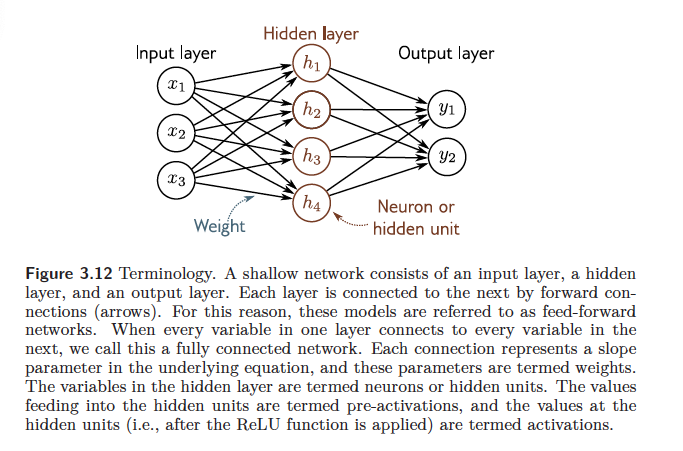

(Prince 2023, p.36)



## Building a single-layer perceptron

Now, it is time to build our very first neural network. It will be a single-layer perceptron, thus it will have no hidden layers.

The aim of the model will be to correctly classify handwritten digits. In other words, we will build a multiclass classifier! For this, we will use the **MNIST** dataset, which is like "Hello, World!" in deep learning.

THe MNIST dataset is a collection of greyscale images of handwritten digits (28 pixels by 28 pixels) ranging from 0 to 9, thus has 10 categories. In the dataset, there are 60,000 training images (with labels) and additional 10,000 images for testing. Also, the dataset was assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can learn more about the dataset [here](https://www.tensorflow.org/datasets/catalog/mnist).

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four NumPy (Numeric Python) arrays.



#### Uploading data

In [ ]:
# First, let's import the modules that we will need for the task.


import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [ ]:
'''
Let's import the MNIST data that consists of:
  1. training data: training images to feed a model and data labels,
  so the model can learn to associate images with labels;
  2. testing data, which will be used to figure our how well our model performs
  on the unseen data;
'''

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### Data exploration and preparation

In [ ]:
# Let's have a look at our training data

print(f"Dimensions: {train_images.ndim}")
print(f"Shape: {train_images.shape}")

print(f"Dimensions of an image: {train_images[4444].ndim}")
print(f"Shape of an image: {train_images[444].shape}")

Dimensions: 3
Shape: (60000, 28, 28)
Dimensions of an image: 2
Shape of an image: (28, 28)



(60000, 28, 28) shape means that there are:
  - 60k observations (images in the training dataset)
  - each image has the following height and width dimensions (number of pixels): 28 x 28
    - thus, the shape of an image is 28 (pixels) by 28 (pixels)

In [ ]:
print(train_images[5])

# It's an array, or more precisely a two dimensional (2D) tensor!
# It's a 2D tensor because it is, essentially, a matrix. It has rows and
# columns (think of an Excel table :))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

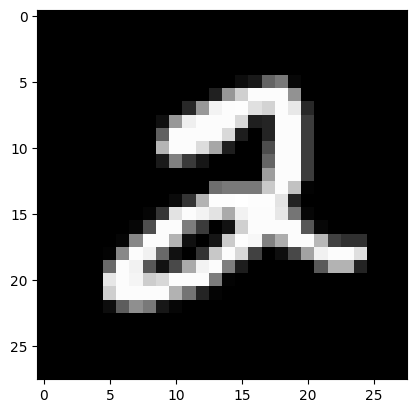

In [ ]:
# Let's visualise a digit, so we know how it looks
plt.imshow(train_images[5], cmap="gray")
# What digit is it? Let'sind out!

In [ ]:
# let's find out the digit's label
print(train_labels[5])

2


In [ ]:
'''
Great, now we have a better understanding of our data. However, to
train a neural network, we need to prepare data for it.

First, we will convert our 28x28 image into a one-dimensional tensor (a vector).

Second, we will reshape (normalise) the data, so that the image values are in the
expected interval range, in this case between 0 and 1, i.e.[0,1]. The imported
values of the imported images are in the [0, 255] interval. But these values are
not what our model expects. We will also change the type of our data to float32
instead of uint8.

'''

train_images = train_images.reshape(60000, 28,28)
test_images = test_images.reshape(10000, 28,28)

# train and test images
train_images_resh = train_images.reshape((60000, 28 * 28)) # converting to a vector
train_images_resh = train_images_resh.astype("float32") / 255 # normalisation and
# conversion to float32
test_images_resh = test_images.reshape((10000, 28 * 28))
test_images_resh = test_images_resh.astype("float32") / 255

# we can check if conversion happened as expected
print(f"Shape of the training data: {train_images_resh.shape}")

Shape of the training data: (60000, 784)


#### Defining model architecture

Now we're ready to build our very first neural network!

Our shallow network will consist only of an input shape and an output layer. A **layer** is a fundamental building block of a neural network. You can think of a layer as a filter for data: some data goes in, and it comes out in a more useful form for the problem at hand.

Our model already has an **input** shape already sorted -- it is an image in the shape of a vector.

The **output** layer is supposed to "tell" us which digit an input shape represents. To do this, our output layer 10-way softmax classification layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

Luckily, Keras can automatically infer an input shape, so we don't need to specify
it explicitly (but you could do it). However, we must specify the
number of neurons our final layer will have, in our case it will be 10.


Additional information:

- **Activation function** helps us to implement complex non-linear data transformations
If we applied no activation function to a Dense layer, then no matter how many
layers we stacked, our model would still be a linear model
(for more see Chollet (2021: p. 46-47))
- We will build a model of **Sequential Class**. It means that all the layers in the model are stacked on each other.
- A **Dense layer** means that our neural network is fully connected, i.e. each input
connects to each neuron in a layer.

IMPORTANT: don't overthink about all these details; this information is to help
you, not overwhelm you! What is important is for you to have an idea of what's
happening in a neural network.

In [ ]:
model1 = keras.Sequential([
keras.layers.Dense(10, # the output shape (a number of neurons)
                   activation= "softmax", # an activation function
                   # input_shape = (28, 28,) # an optional input shape
                   ) ]
                   )

#### Model compilation

To make the model ready for training, we need to pick three more things as part of the compilation step:
1. An optimizer — The mechanism through which the model updates itself based on the training data it sees, so as to improve its performance.
2. A loss function — Used to measure the model's performance on the training data, and thus, how it will be able to steer itself in the right direction.
3. Metrics to monitor during training and testing - in this case we pick accuracy, which is the fraction of the images that were correctly classified.

In [ ]:
model1.compile(
    optimizer="rmsprop",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']) # our success metric is the number of correct digit classifications

#### Training a model

Now it is time to train our model. One way to do it would be to go through all the training data in one go. However, it is better to iterate over the training data, so we can take full advantage of the learning process. Therefore, we will go through our training dataset several times over and, moreover, we will do this in batches.

A **batch** refers to the sample of training data. After each batch the weights will be changed in an attempt to minimise the loss.

An **epoch** refers to a single iteration over the training data.

Note: there is no golden rule for the "best" number of iterations over a dataset you should do or how large your batches should be. Experiment by trying to change these arguments in the `fit()` and see if the accuracy increases while loss function decreases (but be aware of overfitting and underfitting. These concepts will be introduced later).


In [ ]:
history1 = model1.fit(train_images_resh, # images to train on
          train_labels, # labels for ground-truth information
          epochs = 5, # number of iterations over a dataset
          batch_size = 1000) # sample size

In [ ]:
# Plot accuracy over epochs
plt.plot(history1.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.title('model accuracy')
plt.show()

#### Evaluating a model

Model evaluation means running it on the *unseen* (the data was not used in the training process) to understand if it performs as expected (e.g. did not overfit our training data).

In [ ]:
test_loss1, test_acc1 = model1.evaluate(test_images_resh, test_labels)
print(f'Test accuracy: {test_acc1}')


## Building a multi-layer perceptron

Remember, a multi-layer perceptron has at least one hidden layer, BUT a neural network with one hidden layer, would still be a *shallow* neural network.

The process of building a multi-layer perceptron will be exactly the same as for a single-layer perceptron. The only change that we will make will be adding an additional layer.

NOTE: we will not be loading and preparing the MNIST dataset for the model, because we have done so previously. However, if you had exited Google Colab before running this section, then you will need to do upload and prepare the data again. In this case, please rerun the code in the following subsections "Uploading data" and "Data exploration and preparation" in the "Building a single-layer perceptron" section.

### Model architecture

Our second model has an additional layer. In this case it will have 512 units/neuros, but feel free to change it to another number. What about 256? Or perhaps
you should increase it to to 1024?

In [ ]:
model2 = keras.Sequential([
    # a hidden layer with 512 hidden units
    keras.layers.Dense(512, # number of units
                activation = "relu", # activation function
                ),
    # an output layer
    keras.layers.Dense(10, # 10 units
                activation = "softmax") # final activation function
])


### Model compilation

In [ ]:
model2.compile(
    optimizer="rmsprop",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']) # our success metric is the number of correct digit classifications

### Training a model

In [ ]:
# this time we will save our training history as an object, so we can query it
history2 = model2.fit(train_images_resh, # images to train on
          train_labels, # labels for ground-truth information
          epochs = 5, # number of iterations over a dataset
          batch_size = 128) # sample size

In [ ]:
model2.summary()
# total paramaters
print(784*512+512 + 512*10+10)

In [ ]:
test_loss2, test_acc2 = model2.evaluate(test_images_resh, test_labels)
print(f"Test accuracy: {test_acc2}")

### Overfitting and underfitting

Our model performed a bit *worse* on the testing data, which means it *overfitted*.

**Overfitting** happens when our model learns representations that are too specific for the training data, thus it fails to *generalise* well on the unseen data.

**Underfitting** is an opposite to the overfitting. It means that our model performs *better* on the testing data. It means that there still is room for improvement -- our model has not learnt all the useful representations of the data during the training process.

Finding a balance between underfitting and overfitting is at the heart of the machine learning. Generally, it is better for a model to first overfit as it shows that it can generalise. From here the goal is to finetune the model parameters in order to minimise overfitting.
- For example, you could experiment with the batch sizes and/or the number of hidden layers and/or the number of units each layer has.



In [ ]:
# we can easily find out how the difference between the training and testing
# accuracy

# retrieving training accuracy
model2_acc = history2.history["accuracy"] # a list of all accuracies
model2_acc_max = np.argmax(model2_acc) # the highest accuracy

# the difference
print(f"Difference between testing accuracy and training accuracy: {test_acc2 -  model2_acc[model2_acc_max]}")


# Additional code:
# print(history2.params) # look at the parameters of the model
# print(history2.history.keys()) # look at what model history stores


### Plotting the incorrectly guessed digits

To understand model behaviour, it might be useful to plot the digits which our model guessed incorrectly.

For this, we will use the `predict()` function instead of `evaluate()`.
- prediction informs us about the probability that a test_image belongs to a particular class (i.e. is a digit of class 0). The higher the probability, the more likely the image is of that particular class.
- evaluation, on the other hand, does not return individual predictions. It is used to understand if a model underfits or overfits.

In [ ]:
# all predictions
predictions = model2.predict(test_images_resh)
final_predictions = np.argmax(predictions, axis=1)

# subsetting the incorrect predictions, i.e. the test label did not match
# the predicted one
# importantly, we will create the indices (locations in a dataset) of the
# incorrect labels, so we can match this with the labels and images in the
# testing data
(incorrects,) = np.nonzero(final_predictions != test_labels)
print(incorrects[0:10])

# we will plot only 10 incorrect digits
num = 10
incorrect_indices = incorrects[0:num]
num_row = 2
num_col = 5

fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    incorrect_index = incorrect_indices[i]
    ax = axes[i//num_col, i%num_col]
    ax.imshow(test_images[incorrect_index], cmap='gray')
    ax.set_title('Label: {}\nPred: {}'.format(*[test_labels[incorrect_index], final_predictions[incorrect_index]]))
plt.tight_layout()
plt.show()

### Visualising model activations [do not run, no longer works]

You might be interested in visualising the **activations**. You can think of activations in this way: the higher the activation number, the brighter it is. 0 means that a neuron is not active while 1 means that a neuron is active and, likely, holds important information about the data.

For activation visualisation, we will use `Keract` library: https://github.com/philipperemy/keract

In [ ]:
# install the library
# !pip install keract

# import the library
import keract

In [ ]:
'''
Let's visualise the first incorrectly guessed digit. We know that the model
predicted it as 9, but actually it's an image of digit 4.

First, we will visualise this digit again.

Then we will visualise the layers and their activations.
'''
print(incorrects[0])

# digit visualisation
plt.imshow(test_images[incorrects[0]], cmap = "gray")

# activations in the model layers
keract_inputs = test_images_resh[incorrects[0]:incorrects[0]+1] # keract takes a list as an input
keract_targets = test_labels[incorrects[0]:incorrects[0]+1]
activations = keract.get_activations(model2, keract_inputs)
keract.display_activations(activations, cmap="gray", save=False)

## Bonus: DeepDream

It is time to make our multi-layer perceptron "dream". Deep Dreaming techniqye is known for generative images that look like hallucinations. Though what it actually does is maximises the activations in the layers. This technique is supposed to help to understand what a model learns in each layer.

We will implement a Deep Dream technique informed by this tutorial: https://www.tensorflow.org/tutorials/generative/deepdream

We will continue working with the MNIST data and we will be maximising the activations in the layers of the model2.

In [ ]:
'''
 (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape(60000, 28,28)
test_images = test_images.reshape(10000, 28,28)

# train and test images
train_images_resh = train_images.reshape((60000, 28 * 28)) # converting to a vector
train_images_resh = train_images_resh.astype("float32") / 255 # normalisation and
# conversion to float32
test_images_resh = test_images.reshape((10000, 28 * 28))
test_images_resh = test_images_resh.astype("float32") / 255

'''
import IPython.display as display
import PIL.Image

# Keras functional API-style of writing
inputs = keras.Input(shape = (28,28,))
features = keras.layers.Dense(512, activation = "relu")(inputs)
outputs = keras.layers.Dense(10, activation = "softmax")(features)
model_dd = keras.Model(inputs = inputs,
                       outputs = outputs)

model_dd.compile(
    optimizer="rmsprop",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']) # our success metric is the number of correct digit classifications

model_dd.summary()


In [ ]:
# First, we will define the functions that will display the "dreamt" images

# Display an image
def show(img):
  display.display(PIL.Image.fromarray(np.array(img)))

  # Normalize an image
def deprocess(img):
  img = 255*(img + 1.0)/2.0
  return tf.cast(img, tf.uint8)

In [ ]:
# get layer names, so we can specify which layer's activations we want to maximise.

layer_names = []
for layer in range(len(model_dd.layers)):
  layer_names.append(model_dd.get_layer(index=layer).name)

print(layer_names)

In [ ]:
'''
# Maximize the activations of these layers
names = ['mixed3', 'mixed5']
'''
layers = [model_dd.get_layer(name).output for name in layer_names]
#print(layers[5])

# which layer to activate?
# we will activate all layers
# you can subset a particular layer, let's say the first layer by using the following: layers[1]
layer_act = layers

# Create the feature extraction model
dream_model = keras.Model(inputs=model_dd.input,
                             outputs=layer_act)


In [ ]:
def calc_loss(img, model):
  # Pass forward the image through the model to retrieve the activations.
  # Converts the image into a batch of size 1.
  img_batch = tf.expand_dims(img, axis=0)
  layer_activations = model(img_batch)
  if len(layer_activations) == 1:
    layer_activations = [layer_activations]

  losses = []
  for act in layer_activations:
    loss = tf.math.reduce_mean(act)
    losses.append(loss)

  return  tf.reduce_sum(losses)

In [ ]:
class DeepDream(tf.Module):
  def __init__(self, model):
    self.model = model

  @tf.function(
      input_signature=(
        tf.TensorSpec(shape=[28,28,], dtype=tf.float32),
        tf.TensorSpec(shape=[], dtype=tf.int32),
        tf.TensorSpec(shape=[], dtype=tf.float32),)
  )
  def __call__(self, img, steps, step_size):
      print("Tracing")
      loss = tf.constant(0.0)
      for n in tf.range(steps):
        with tf.GradientTape() as tape:
          # This needs gradients relative to `img`
          # `GradientTape` only watches `tf.Variable`s by default
          tape.watch(img)
          loss = calc_loss(img, self.model)

        # Calculate the gradient of the loss with respect to the pixels of the input image.
        gradients = tape.gradient(loss, img)

        # Normalize the gradients.
        gradients /= tf.math.reduce_std(gradients) + 1e-8

        # In gradient ascent, the "loss" is maximized so that the input image increasingly "excites" the layers.
        # You can update the image by directly adding the gradients (because they're the same shape!)
        img = img + gradients*step_size
        img = tf.clip_by_value(img, -1, 1)

      return loss, img

In [ ]:
deepdream = DeepDream(dream_model)

In [ ]:
def run_deep_dream_simple(img, steps=100, step_size=0.1):
  # Convert from uint8 to the range expected by the model.
  img = tf.keras.applications.inception_v3.preprocess_input(img)
  img = tf.convert_to_tensor(img)
  step_size = tf.convert_to_tensor(step_size)
  steps_remaining = steps
  step = 0
  while steps_remaining:
    if steps_remaining>100:
      run_steps = tf.constant(100)
    else:
      run_steps = tf.constant(steps_remaining)
    steps_remaining -= run_steps
    step += run_steps

    loss, img = deepdream(img, run_steps, tf.constant(step_size))

    display.clear_output(wait=True)
    show(deprocess(img))
    print ("Step {}, loss {}".format(step, loss))


  result = deprocess(img)

  display.clear_output(wait=True)
  show(result)

  return result

In [ ]:
dream_img = run_deep_dream_simple(img=test_images[555],
                                  steps=10,
                                  step_size=0.01)
plt.imshow(dream_img, cmap = "gray")

## Summary

This is the end of today's lab!

By now you should have an idea of how to build a single-layer perceptron or a multi-layer perceptron as well as visualise the activations in the layers.  To cement your knowledge, I would recommend the following:
1. Return to the multi-layer perceptron that we created and try to minimise its overfitting without adding new layers.
2. Add more "depth" to the perceptron. Can you create a multi-layer perceptron with two or three hidden layers?
3. If you want to get even deeper, go through Chollet's (2021) textbook "Deep Learning with Python" chapters 1-3.
  - Please note that this is not mandatory. Also, if you do decide to dive in, then do not get discouraged if it takes more time than expected to through the material or that you do not understand everything. It is a process.


**Next week** you will:
- get introduced to the convolutional neural networks (CNNs);
- implement the Deep Dream technique on a CNN-based neural network;

## Resources

Deep learning textbooks:
- Chollet, F. (2021) Deep Learning with Python. 2nd edn. Manning.
  - chapters 1 and 3
- Foster, D. (2023) Generative Deep Learning: Teaching Machines to Paint, Write, Compose, and Play. 2nd edition. Beijing Boston Farnham Sebastopol Tokyo: Oreilly & Associates Inc.
  - chapters 1 and 2


Python:
- Intro: https://pages.github.warwick.ac.uk/CIM-Methods/coding_skills/content/python/python/04_loops.html
- Data types: https://www.geeksforgeeks.org/python-data-types/

Keras:
- Sequential Model: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
- Dense layers: https://wandb.ai/ayush-thakur/keras-dense/reports/Keras-Dense-Layer-How-to-Use-It-Correctly--Vmlldzo0MjAzNDY1
- Activation functions: https://keras.io/api/layers/activations/

DeepDream:
- Keras tutorial: https://www.tensorflow.org/tutorials/generative/deepdream
- Google Blog post: https://blog.research.google/2015/06/inceptionism-going-deeper-into-neural.html

